In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('df_acidentes.csv')
pd.set_option('max_columns', None)

df.shape

(609846, 24)

In [84]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'causa_acidente',
       'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'tipo_veiculo', 'ano_fabricacao_veiculo', 'tipo_envolvido', 'idade',
       'sexo', 'ilesos', 'mortos', 'latitude', 'longitude', 'ano',
       'feridos_cal'],
      dtype='object')

In [85]:
df.isnull().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
tipo_veiculo              0
ano_fabricacao_veiculo    0
tipo_envolvido            0
idade                     0
sexo                      0
ilesos                    0
mortos                    0
latitude                  0
longitude                 0
ano                       0
feridos_cal               0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609846 entries, 0 to 609845
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      609846 non-null  float64
 1   data_inversa            609846 non-null  object 
 2   dia_semana              609846 non-null  object 
 3   horario                 609846 non-null  object 
 4   uf                      609846 non-null  object 
 5   causa_acidente          609846 non-null  object 
 6   tipo_acidente           609846 non-null  object 
 7   classificacao_acidente  609846 non-null  object 
 8   fase_dia                609846 non-null  object 
 9   condicao_metereologica  609846 non-null  object 
 10  tipo_pista              609846 non-null  object 
 11  tracado_via             609846 non-null  object 
 12  uso_solo                609846 non-null  object 
 13  tipo_veiculo            609846 non-null  object 
 14  ano_fabricacao_veicu

In [12]:
# Total de variáveis a serem classificadas


# - id                        - Quantitativa Continua
# - dia_semana                - Qualitativa Ordinal *
# - horario                   - Qualitativa Ordinal *
# - uf                        - Qualitativa Nominal
# - causa_acidente            - Qualitativa Nominal
# - tipo_acidente             - Qualitativa Nominal
# - classificacao_acidente    - Qualitativa Ordinal *
# - fase_dia                  - Qualitativa Ordinal
# - condicao_metereologica    - Qualitativa Nominal
# - tipo_pista                - Qualitativa Nominal
# - tracado_via               - Qualitativa Nominal
# - uso_solo                  - Qualitativa Nominal
# - tipo_veiculo              - Qualitativa Nominal
# - ano_fabricacao_veiculo    - Quantitativa Continua
# - tipo_envolvido            - Qualitativa Nominal
# - idade                     - Quantitativa Continua
# - sexo                      - Qualitativa Nominal
# - ilesos                    - Quantitativa Discreta
# - mortos                    - Quantitativa Discreta
# - ano                       - Quantitativa Continua
# - feridos_cal               - Quantitativa Discreta

In [13]:
# Variáveis que deveremos transformar em quantitativas :

# dia_semana                - Qualitativa Ordinal * https://statisticalanalysisconsulting.com/is-time-nominal-ordinal-interval-or-ratio-is-it-categorical-or-continuous/#:~:text=For%20instance%2C%20suppose%20you%20are,was%20president%20at%20the%20time.
# causa_acidente            - Qualitativa Nominal
# tipo_acidente             - Qualitativa Nominal
# classificacao_acidente    - Qualitativa Ordinal * Reposta 
# fase_dia                  - Qualitativa Ordinal 
# condicao_metereologica    - Qualitativa Nominal
# tipo_pista                - Qualitativa Nominal
# tracado_via               - Qualitativa Nominal
# uso_solo                  - Qualitativa Nominal
# tipo_veiculo              - Qualitativa Nominal
# tipo_envolvido            - Qualitativa Nominal
# sexo                      - Qualitativa Nominal

In [14]:
#  id                        266747 - Excluir
#  data_inversa               89563 - non-null  datetime64[ns] - resgatar (modelagem ciclica)
#  dia_semana                     7 - Felipe - Proposta de Modelagem (modelagem ciclica)
#  horario                     1434 - Felipe - Proposta de Modelagem (modelagem ciclica)
#  uf                            27 - Excluir
#  causa_acidente                24 - Usar (Sem problemas na dimensão atual)
#  tipo_acidente                 16 - Usar
#  classificacao_acidente         3 - Variável Resposta ( Usar )
#  fase_dia                       4 - Usar fase_dia
#  condicao_metereologica         9 - Usar
#  tipo_pista                     3 - Usar
#  tracado_via                    9 - Usar
#  uso_solo                       2 - Usar
#  tipo_veiculo                  23 - Usar
#  ano_fabricacao_veiculo        70 - Usar
#  tipo_envolvido                 4 - Dropar passageiro -> Dropar Coluna (Testar)
#  idade                        109 - Dropar passageiro -> Dropar Coluna (Testar)
#  sexo                           2 - Dropar passageiro -> Dropar Coluna (Testar)
#  ilesos                         2 - Variável Resposta - Excluir (p/Pessoa)
#  mortos                         2 - Variável Resposta - Excluir (p/Pessoa)
#  ano                            4 - Excluir
#  feridos_cal                    2 - Variável Resposta - Excluir (p/Pessoa)

## Modelando Variáveis Ciclicas;

- data_inversa
- dia_semana
- horario

In [89]:
df['data_inversa'].sample(10)

111401    2017-07-30
339169    2018-12-08
72298     2017-05-17
336734    2018-12-02
423206    2019-05-19
363127    2019-06-22
363578    2019-06-29
215342    2018-02-10
525127    2020-09-27
604352    2020-09-15
Name: data_inversa, dtype: object

In [90]:
pd.set_option('max_columns', None)

In [91]:
df[['ano_t','mes','dia']] = df['data_inversa'].str.split('-',expand=True)
df.sample(5)

,id,data_inversa,dia_semana,horario,uf,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,ano_fabricacao_veiculo,tipo_envolvido,idade,sexo,ilesos,mortos,latitude,longitude,ano,feridos_cal,ano_t,mes,dia
113694,59537.0,2017-08-04,sexta-feira,15:10:00,RJ,Pista Escorregadia,Colisão frontal,Com Vítimas Feridas,Pleno dia,Chuva,Simples,Curva,Rural,Automóvel,2006.00000,Condutor,51.00000,Masculino,0.0,0.0,-22.489090,-43.223700,2017.0,1.0,2017,08,04
498589,254849.0,2019-12-08,domingo,22:30:00,RS,Ingestão de Álcool,Saída de leito carroçável,Sem Vítimas,Plena Noite,Céu Claro,Simples,Curva,Rural,Automóvel,2016.00000,Passageiro,55.00000,Masculino,1.0,0.0,-29.383443,-54.745175,2019.0,0.0,2019,12,08
598569,304686.0,2020-08-30,domingo,20:30:00,PR,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Reta,Rural,Automóvel,2010.00000,Passageiro,64.00000,Feminino,0.0,0.0,-25.185033,-50.687438,2020.0,1.0,2020,08,30
127009,66575.0,2017-08-31,quinta-feira,19:50:00,RS,Desobediência às normas de trânsito pelo condutor,Colisão transversal,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Curva,Rural,Automóvel,2007.00000,Passageiro,35.00000,Feminino,0.0,0.0,-28.348030,-53.502120,2017.0,1.0,2017,08,31
42300,21892.0,2017-03-22,quarta-feira,12:30:00,SC,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Pleno dia,Céu Claro,Múltipla,Reta,Urbano,Caminhão,2008.86264,Condutor,38.07216,Feminino,1.0,0.0,-27.521084,-48.637201,2017.0,0.0,2017,03,22


#### - Reorganizando Dataset

In [92]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'causa_acidente',
       'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'tipo_veiculo', 'ano_fabricacao_veiculo', 'tipo_envolvido', 'idade',
       'sexo', 'ilesos', 'mortos', 'latitude', 'longitude', 'ano',
       'feridos_cal', 'ano_t', 'mes', 'dia'],
      dtype='object')

In [93]:
df = df[['id', 'mes', 'dia', 'dia_semana', 'horario', 'uf', 'causa_acidente',
       'tipo_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'tipo_veiculo', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'idade', 'sexo', 'ano', 'latitude', 'longitude', 'ilesos', 'feridos_cal',
       'mortos', 'classificacao_acidente']]

In [94]:
df.shape # ou seja apenas adicionamos o dia e mes!

(609846, 25)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609846 entries, 0 to 609845
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      609846 non-null  float64
 1   mes                     609846 non-null  object 
 2   dia                     609846 non-null  object 
 3   dia_semana              609846 non-null  object 
 4   horario                 609846 non-null  object 
 5   uf                      609846 non-null  object 
 6   causa_acidente          609846 non-null  object 
 7   tipo_acidente           609846 non-null  object 
 8   fase_dia                609846 non-null  object 
 9   condicao_metereologica  609846 non-null  object 
 10  tipo_pista              609846 non-null  object 
 11  tracado_via             609846 non-null  object 
 12  uso_solo                609846 non-null  object 
 13  tipo_veiculo            609846 non-null  object 
 14  ano_fabricacao_veicu

In [96]:
df[['mes', 'dia']] = df[['mes', 'dia']].astype('int64')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609846 entries, 0 to 609845
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      609846 non-null  float64
 1   mes                     609846 non-null  int64  
 2   dia                     609846 non-null  int64  
 3   dia_semana              609846 non-null  object 
 4   horario                 609846 non-null  object 
 5   uf                      609846 non-null  object 
 6   causa_acidente          609846 non-null  object 
 7   tipo_acidente           609846 non-null  object 
 8   fase_dia                609846 non-null  object 
 9   condicao_metereologica  609846 non-null  object 
 10  tipo_pista              609846 non-null  object 
 11  tracado_via             609846 non-null  object 
 12  uso_solo                609846 non-null  object 
 13  tipo_veiculo            609846 non-null  object 
 14  ano_fabricacao_veicu

#### - Modelando - mes

In [98]:
df['mes'].sample(5)

184863    12
337927    12
557653     4
407160     3
376239     1
Name: mes, dtype: int64

In [99]:
df['mes'].describe() # Tudo certo com o mes !

count    609846.000000
mean          6.273661
std           3.448733
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: mes, dtype: float64

In [100]:
df['mes_sin']=np.sin(2.*np.pi*df.mes/12)
df['mes_cos']=np.cos(2.*np.pi*df.mes/12)

In [101]:
df.sample(5)

,id,mes,dia,dia_semana,horario,uf,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,ano_fabricacao_veiculo,tipo_envolvido,idade,sexo,ano,latitude,longitude,ilesos,feridos_cal,mortos,classificacao_acidente,mes_sin,mes_cos
108941,57194.0,7,26,quarta-feira,10:50:00,CE,Avarias e/ou desgaste excessivo no pneu,Tombamento,Pleno dia,Céu Claro,Dupla,Reta,Urbano,Motocicleta,2016.00000,Passageiro,18.00000,Feminino,2017.0,-3.762514,-38.655570,0.0,1.0,0.0,Com Vítimas Feridas,-0.500000,-8.660254e-01
499079,255129.0,9,15,domingo,18:40:00,BA,Falta de Atenção à Condução,Colisão frontal,Plena Noite,Céu Claro,Simples,Reta,Rural,Automóvel,2008.86264,Condutor,38.07216,Masculino,2019.0,-11.374879,-40.024969,0.0,0.0,0.0,Com Vítimas Feridas,-1.000000,-1.836970e-16
400156,196902.0,3,14,quinta-feira,10:30:00,RJ,Não guardar distância de segurança,Colisão traseira,Pleno dia,Céu Claro,Simples,Reta,Urbano,Automóvel,2007.00000,Condutor,35.00000,Masculino,2019.0,-21.713665,-41.308619,1.0,0.0,0.0,Sem Vítimas,1.000000,6.123234e-17
355127,190132.0,2,8,sexta-feira,17:45:00,RJ,Falta de Atenção à Condução,Colisão lateral,Pleno dia,Nublado,Simples,Reta,Rural,Caminhão,2015.00000,Condutor,60.00000,Masculino,2019.0,-22.539900,-43.224100,1.0,0.0,0.0,Sem Vítimas,0.866025,5.000000e-01
380580,185532.0,1,16,quarta-feira,09:20:00,PA,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Pleno dia,Céu Claro,Simples,Reta,Urbano,Automóvel,2014.00000,Condutor,60.00000,Masculino,2019.0,-4.293095,-47.556904,1.0,0.0,0.0,Com Vítimas Feridas,0.500000,8.660254e-01


C:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mes_sin', ylabel='mes_cos'>

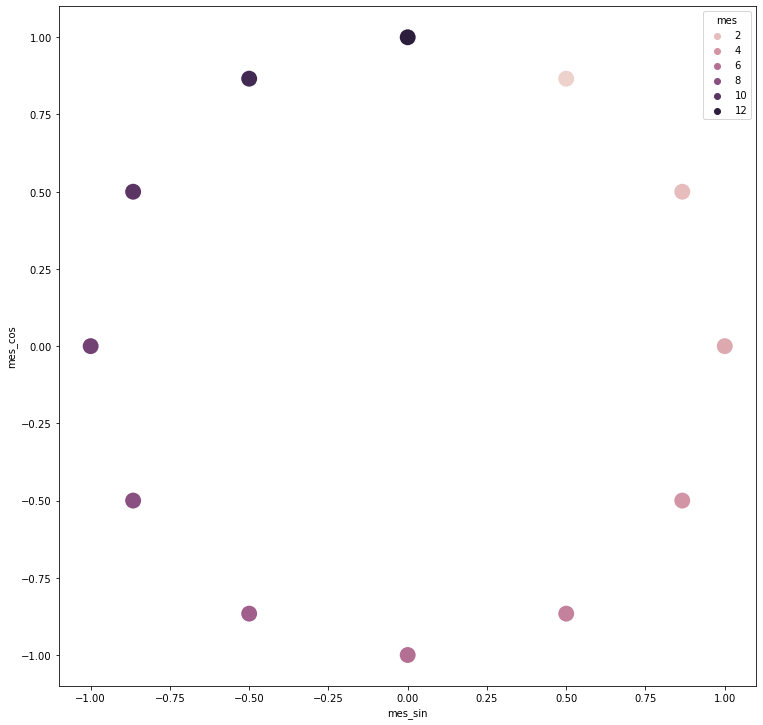

In [102]:
plt.figure(figsize=(12.5,12.5))
sns.scatterplot(df['mes_sin'],df['mes_cos'],hue=df['mes'],s=300)

#### - Modelando - dia_semana

In [103]:
df['dia_semana'].sample(10)

308565    segunda-feira
515376     quinta-feira
459080    segunda-feira
479062           sábado
198171          domingo
529907           sábado
179255      terça-feira
584968    segunda-feira
214236      sexta-feira
85386           domingo
Name: dia_semana, dtype: object

'''Primeiro é necessário transformar o dia da semana em número! O Label Encoder não vai funcionar, pois da ordem aleatória de números,
neste caso precisamos que segunda (1) e depois terça(2), para que os seno e cosseno realmente passem uma ideia ciclica respeitando a 
ordem dos dias da semana'''

In [104]:
# Transformando dia da semana em número e normalizando ela. Como saída teremos 3 colunas novas.

def week_to_feature(df,week_days):
    
    df['dias_semana_num']=df[week_days]
    
    dic = {'domingo':7          
    ,'sábado':6           
    ,'sexta-feira':5   
    ,'quinta-feira':4    
    ,'quarta-feira':3     
    ,'terça-feira':2
    ,'segunda-feira':1} # Começar com 1 pois caso não seja ira gerar um ciclo com 6 números
        
    for days, num in dic.items():
        
         #print (days)
         #print (num)
         df['dias_semana_num'].replace(days,num,inplace=True)
            
    df['dias_semana_norm']=df['dias_semana_num']/df['dias_semana_num'].max() # normaliza os dias da semana < 1
    
    df['dias_semana_sin']=np.sin(2.*np.pi*df.dias_semana_norm)
    df['dias_semana_cos']=np.cos(2.*np.pi*df.dias_semana_norm)
    
    # Printando o resultado do processo... 
    
    plt.figure(figsize=(12.5,12.5))
    sns.scatterplot(df['dias_semana_sin'],df['dias_semana_cos'],hue=df['dia_semana'],s=300)
   

C:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


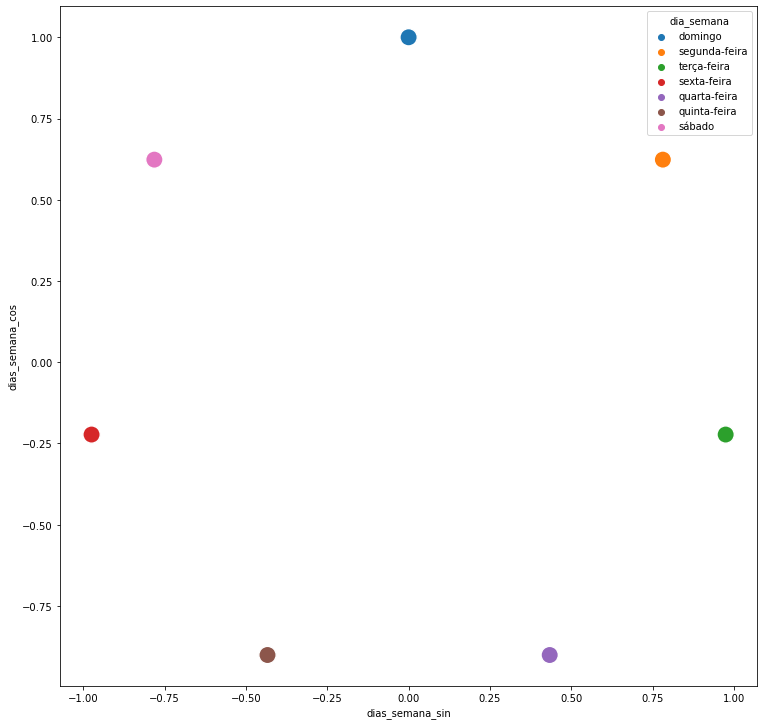

In [105]:
week_to_feature(df,'dia_semana')

#### - Modelando - horario

In [106]:
df[['hora','minuto','segundo']] = df['horario'].str.split(':',expand=True)
df.sample(5)

,id,mes,dia,dia_semana,horario,uf,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,ano_fabricacao_veiculo,tipo_envolvido,idade,sexo,ano,latitude,longitude,ilesos,feridos_cal,mortos,classificacao_acidente,mes_sin,mes_cos,dias_semana_num,dias_semana_norm,dias_semana_sin,dias_semana_cos,hora,minuto,segundo
22865,11663.0,2,13,segunda-feira,07:20:00,MG,Velocidade Incompatível,Saída de leito carroçável,Pleno dia,Chuva,Simples,Curva,Rural,Motocicleta,2012.0,Condutor,28.0,Masculino,2017.0,-19.671900,-42.972200,0.0,1.0,0.0,Com Vítimas Feridas,0.866025,5.000000e-01,1,0.142857,0.781831,0.623490,07,20,00
454683,228711.0,8,14,quarta-feira,14:00:00,SC,Não guardar distância de segurança,Colisão lateral,Pleno dia,Céu Claro,Dupla,Reta,Urbano,Camioneta,2015.0,Condutor,56.0,Feminino,2019.0,-27.584347,-48.607221,1.0,0.0,0.0,Com Vítimas Feridas,-0.866025,-5.000000e-01,3,0.428571,0.433884,-0.900969,14,00,00
399586,196531.0,3,12,terça-feira,12:35:00,RJ,Defeito na Via,Queda de ocupante de veículo,Pleno dia,Nublado,Simples,Interseção de vias,Rural,Motocicleta,2008.0,Condutor,46.0,Masculino,2019.0,-22.705651,-43.290575,0.0,1.0,0.0,Com Vítimas Feridas,1.000000,6.123234e-17,2,0.285714,0.974928,-0.222521,12,35,00
58135,30636.0,4,20,quinta-feira,22:00:00,MG,Ingestão de Álcool,Colisão lateral,Plena Noite,Céu Claro,Simples,Curva,Rural,Caminhonete,2010.0,Passageiro,40.0,Feminino,2017.0,-19.847842,-43.162600,1.0,0.0,0.0,Sem Vítimas,0.866025,-5.000000e-01,4,0.571429,-0.433884,-0.900969,22,00,00
464382,234425.0,9,9,segunda-feira,19:20:00,RJ,Defeito Mecânico no Veículo,Incêndio,Plena Noite,Céu Claro,Dupla,Reta,Urbano,Ônibus,2014.0,Condutor,37.0,Masculino,2019.0,-22.756775,-43.431072,1.0,0.0,0.0,Sem Vítimas,-1.000000,-1.836970e-16,1,0.142857,0.781831,0.623490,19,20,00


In [107]:
df[['hora','minuto','segundo']] = df[['hora','minuto','segundo']].astype('float64')

In [108]:
df['horario_float'] = df['hora']  + df['minuto']/60

In [109]:
df['horario_float'].sample(5)

461473    10.500000
445004    16.750000
558514    15.416667
6774      11.666667
566548     9.750000
Name: horario_float, dtype: float64

df['horario_sin']=np.sin(2.*np.pi*df.horario_float/24.)
df['horario_cos']=np.cos(2.*np.pi*df.horario_float/24.)

C:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horario_sin', ylabel='horario_cos'>

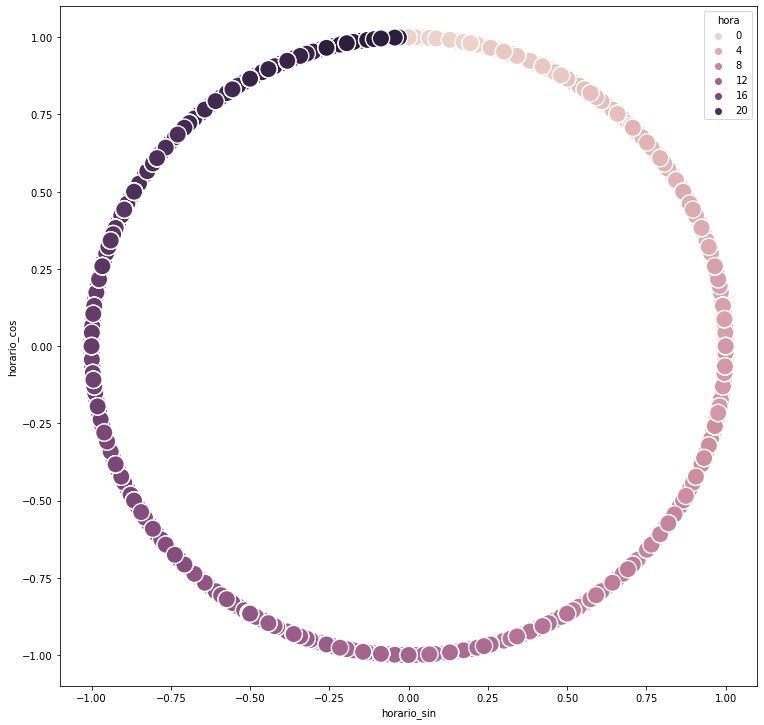

In [111]:
plt.figure(figsize=(12.5,12.5))
sns.scatterplot(df['horario_sin'],df['horario_cos'],s=300,hue=df['hora'])

# Reorganizar Data Frame e eliminar coisas que não precisamos !!!! Depois export

In [112]:
df.shape

(609846, 37)

In [113]:
df.columns

Index(['id', 'mes', 'dia', 'dia_semana', 'horario', 'uf', 'causa_acidente',
       'tipo_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'tipo_veiculo', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'idade', 'sexo', 'ano', 'latitude', 'longitude',
       'ilesos', 'feridos_cal', 'mortos', 'classificacao_acidente', 'mes_sin',
       'mes_cos', 'dias_semana_num', 'dias_semana_norm', 'dias_semana_sin',
       'dias_semana_cos', 'hora', 'minuto', 'segundo', 'horario_float',
       'horario_sin', 'horario_cos'],
      dtype='object')

In [114]:
df = df[['id', 'mes', 'mes_sin', 'mes_cos','dia', 'dia_semana','dias_semana_sin',
       'dias_semana_cos', 'hora', 'minuto',
       'horario_sin', 'horario_cos', 'uf', 'causa_acidente',
       'tipo_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'tipo_veiculo', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'idade', 'sexo','latitude','longitude', 'ano', 'ilesos', 'feridos_cal',
       'mortos', 'classificacao_acidente']]

In [115]:
df.shape

(609846, 32)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609846 entries, 0 to 609845
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      609846 non-null  float64
 1   mes                     609846 non-null  int64  
 2   mes_sin                 609846 non-null  float64
 3   mes_cos                 609846 non-null  float64
 4   dia                     609846 non-null  int64  
 5   dia_semana              609846 non-null  object 
 6   dias_semana_sin         609846 non-null  float64
 7   dias_semana_cos         609846 non-null  float64
 8   hora                    609846 non-null  float64
 9   minuto                  609846 non-null  float64
 10  horario_sin             609846 non-null  float64
 11  horario_cos             609846 non-null  float64
 12  uf                      609846 non-null  object 
 13  causa_acidente          609846 non-null  object 
 14  tipo_acidente       

In [117]:
df.sample(5)

,id,mes,mes_sin,mes_cos,dia,dia_semana,dias_semana_sin,dias_semana_cos,hora,minuto,horario_sin,horario_cos,uf,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,ano_fabricacao_veiculo,tipo_envolvido,idade,sexo,latitude,longitude,ano,ilesos,feridos_cal,mortos,classificacao_acidente
418936,207828.0,5,5.000000e-01,-0.866025,7,terça-feira,0.974928,-0.222521,14.0,15.0,-0.555570,-0.831470,SP,Ingestão de Álcool,Colisão lateral,Pleno dia,Céu Claro,Simples,Reta,Rural,Caminhonete,2000.0,Condutor,41.0,Masculino,-22.732813,-45.098679,2019.0,0.0,1.0,0.0,Com Vítimas Feridas
90580,47772.0,6,1.224647e-16,-1.000000,21,quarta-feira,0.433884,-0.900969,8.0,0.0,0.866025,-0.500000,PA,Falta de Atenção à Condução,Colisão lateral,Pleno dia,Céu Claro,Dupla,Reta,Urbano,Caminhão-trator,2016.0,Condutor,36.0,Masculino,-5.360600,-49.080700,2017.0,1.0,0.0,0.0,Com Vítimas Feridas
75653,39801.0,5,5.000000e-01,-0.866025,22,segunda-feira,0.781831,0.623490,22.0,10.0,-0.461749,0.887011,MG,Falta de Atenção à Condução,Tombamento,Plena Noite,Céu Claro,Dupla,Curva,Rural,Caminhão-trator,2014.0,Condutor,25.0,Masculino,-21.648992,-45.299399,2017.0,0.0,1.0,0.0,Com Vítimas Feridas
511980,269798.0,2,8.660254e-01,0.500000,17,segunda-feira,0.781831,0.623490,4.0,50.0,0.953717,0.300706,SC,Defeito na Via,Saída de leito carroçável,Amanhecer,Garoa/Chuvisco,Simples,Desvio Temporário,Rural,Caminhão-trator,1986.0,Condutor,60.0,Masculino,-27.292120,-50.175362,2020.0,0.0,1.0,0.0,Com Vítimas Feridas
543051,269858.0,2,8.660254e-01,0.500000,17,segunda-feira,0.781831,0.623490,10.0,30.0,0.382683,-0.923880,BA,Ultrapassagem Indevida,Colisão frontal,Pleno dia,Céu Claro,Simples,Reta,Rural,Caminhonete,2012.0,Passageiro,25.0,Feminino,-12.412577,-38.459204,2020.0,1.0,0.0,0.0,Com Vítimas Feridas


In [118]:
'''Variaveis ciclicas modeladas'''


df.to_csv('df_acidentes_v2.csv',index=False)

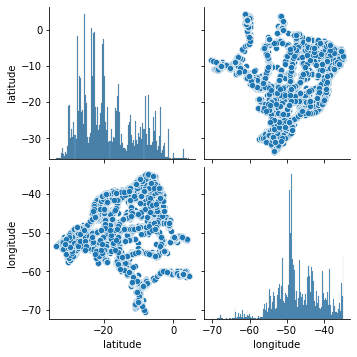

In [119]:
sns.pairplot(df[['latitude','longitude']])

In [120]:
df.isnull().sum()


id                        0
mes                       0
mes_sin                   0
mes_cos                   0
dia                       0
dia_semana                0
dias_semana_sin           0
dias_semana_cos           0
hora                      0
minuto                    0
horario_sin               0
horario_cos               0
uf                        0
causa_acidente            0
tipo_acidente             0
fase_dia                  0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
tipo_veiculo              0
ano_fabricacao_veiculo    0
tipo_envolvido            0
idade                     0
sexo                      0
latitude                  0
longitude                 0
ano                       0
ilesos                    0
feridos_cal               0
mortos                    0
classificacao_acidente    0
dtype: int64